# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

loading the data

In [2]:
filefolder = './data/'
dataset = filefolder + 'data.tsv.gz'
df = pd.read_csv(dataset, sep='\t', on_bad_lines='skip')

There are at least one bad lines. Those are skipped when loading the data. Below is a breif summary of how the dataframe looks.

In [3]:
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

#### Task 2.1
filter duplicate rows from the data

In [4]:
df = df.drop_duplicates(subset = ['id'], keep='first', ignore_index=True)
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13484,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13485,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13486,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


The row index and id should match now.

#### Task 2.2

For this task, we notice the second comment of 'The data' section at the top of the documents. It says: When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy insures one motorcycle, only baseline_motorcycle1 and update_motorcycle1 will be filled).

We also consider rows violating this comment anomalous rows and filter them here.

In [5]:
df_index = df.index
k = 4
anomalous_row = []
for i in df_index:
    contract = df.loc[i, :]
    na_bool = contract.isna()
    anomalous = False
    all_count = base_count = 0
    flag_end = False
    for j in range(1, k+1):
        if na_bool['baseline_motorcycle'+str(j)] != na_bool['update_motorcycle'+str(j)]:
            anomalous = True
            break
        if na_bool['baseline_motorcycle'+str(j)] == True:
            flag_end = True
        else:
            all_count += 1
        if not flag_end:
            base_count += 1
    ## all_count counts the number of non-nan columns, base_count counts the first non-nan columns, we expect all_couunt == all_count. In other words, all the non-nan columns are in the beginning.
    if base_count != contract['motorcycle_count'] or all_count != base_count:
        anomalous = True
    if anomalous == True:
        anomalous_row.append(i)
print("there are " + str(len(anomalous_row)) + " anomalous rows!")
df_clean = df.drop(anomalous_row, axis=0).reset_index(drop=True)


there are 890 anomalous rows!


#### Task 2.3
We calculate the mean and the median value of each column related to kilometrages. 

In [6]:
df_clean.loc[:,'baseline_motorcycle1':'update_motorcycle4'].aggregate(['mean', 'median'], axis=0, skipna=True)

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,7.937768e+14,7.937768e+14,67531.300289,92489.323041,71206.078582,95797.861325,105434.386364,132059.727273
median,5.600000e+04,8.218850e+04,56141.000000,82119.000000,62932.000000,90602.000000,105271.000000,136092.000000


The values for baseline_motorcycle1 and update_motorcycle1 seem implausible because the mean is abnormally larger than the median. There are likely abnormally large outliers driving up the mean. We use boxplots to visualize outliers.

Text(0.5, 1.0, 'Kilometrage of baseline and updated motorcycle 1-4')

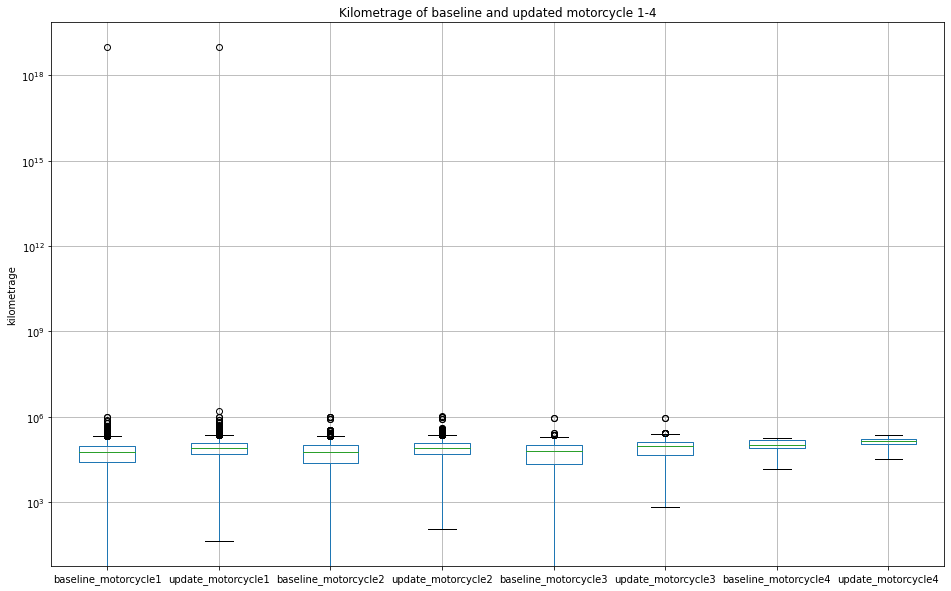

In [7]:
box_plot = df_clean.loc[:,'baseline_motorcycle1':'update_motorcycle4'].boxplot(figsize=(16,10))
box_plot.set_yscale('log')
box_plot.set_ylabel('kilometrage')
box_plot.set_title('Kilometrage of baseline and updated motorcycle 1-4')

We decide to remove the out liers above $10^{18}$. The new boxplot is shown below.

Text(0.5, 1.0, 'Kilometrage of baseline and updated motorcycle 1-4 without outliers')

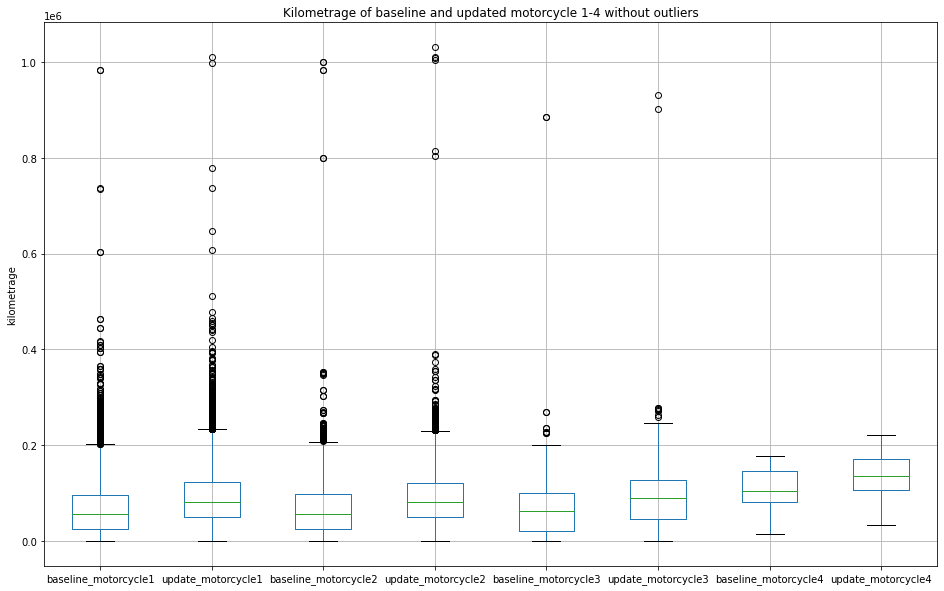

In [8]:
df_remove_outlier = df_clean.drop(df_clean.index[(df_clean['baseline_motorcycle1']>1e+18) | (df_clean['update_motorcycle1']>1e+18)]).reset_index(drop=True)
box_plot = df_remove_outlier.loc[:,'baseline_motorcycle1':'update_motorcycle4'].boxplot(figsize=(16,10))
box_plot.set_ylabel('kilometrage')
box_plot.set_title('Kilometrage of baseline and updated motorcycle 1-4 without outliers')

#### Task 2.4
Median is the better way to summarize numerical data, because mean is highly sensitive to outliers. As shown above, one outlier can make the mean off by several orders of magnitude.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

#### Task 3.1
In the following, we create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. which respectively contain the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.

In [9]:
df_remove_outlier['baseline_average'] = df_remove_outlier.loc[:,['baseline_motorcycle'+str(i) for i in range(1,k+1)]].mean(axis = 1, skipna = True)
df_remove_outlier['update_average'] = df_remove_outlier.loc[:,['update_motorcycle'+str(i) for i in range(1,k+1)]].mean(axis = 1, skipna = True)
df_remove_outlier['diff_average'] = (df_remove_outlier['baseline_average'] - df_remove_outlier['update_average']).abs()
df_remove_outlier

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,Sign Bottom,13483,32050,33346,NaN,NaN,NaN,NaN,NaN,NaN,1,32050.0,33346.0,1296.0
12592,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2,31680.5,54183.5,22503.0
12593,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2,60190.0,86243.0,26053.0
12594,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1,29884.0,35459.0,5575.0


#### Task 3.2
We propose to measure the mean of the relative change of the distance. In other words, it should be
$$
\mathrm{MEAN}_{i} \frac{{\rm update\_motorcycle}_i - {\rm baseline\_motorcycle}_i}{{\rm baseline\_motorcycle_i}}
$$
In terms of analyzing the abnormality in the distance of the motorcycle, the relative change is more meaningful than the absolute value.

#### Task 3.3
In the following, we plot the distribution of motorcycles per policy in the data.

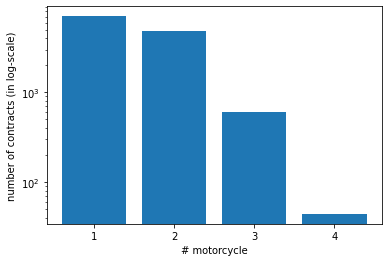

In [10]:
from collections import defaultdict
df_remove_outlier_index = df_remove_outlier.index
num_cycle_dict = defaultdict(int)
for i in df_remove_outlier_index:
    contract = df_remove_outlier.loc[i, :]
    na_bool = contract.isna()
    num_cycle = 4 - na_bool.sum() // 2
    num_cycle_dict[num_cycle] += 1

num_cycle_dict_x, num_cycle_dict_y = zip(*sorted(num_cycle_dict.items()))
plt.bar(num_cycle_dict_x, num_cycle_dict_y)
plt.xlabel('# motorcycle')
plt.ylabel('number of contracts (in log-scale)')
plt.yscale('log')
plt.xticks([1,2,3,4])
plt.show()

#### Task 3.4
We calculated the mean and the 
standard deviation of the average kilometrage for each policy for the updated contract (which should be in the column `update_average`).

In [11]:
print('mean of the average kilometrage for each policy for the updated contract:', df_remove_outlier['update_average'].mean())
print('std of the average kilometrage for each policy for the updated contract:', df_remove_outlier['update_average'].std())

mean of the average kilometrage for each policy for the updated contract: 92204.34293955752
std of the average kilometrage for each policy for the updated contract: 53013.20724230808


#### Task 3.5
Considering only policies with 4 motorcycles insured, we calculate the mean and the standard deviation of the kilometrage per motorcycle in the updated contract.

In [12]:
df_remove_outlier_full = []
df_remove_outlier_index = df_remove_outlier.index
for i in df_remove_outlier_index:
    contract = df_remove_outlier.loc[i, :]
    na_bool = contract.isna()
    if not na_bool['baseline_motorcycle4']:
        df_remove_outlier_full.append(contract)
df_remove_outlier_full = pd.DataFrame(df_remove_outlier_full)

In [13]:
df_remove_outlier_full.loc[:,['update_motorcycle'+str(i) for i in range(1,k+1)]].aggregate(['mean', 'std'], axis=0)

,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
mean,93070.863636,123098.886364,105545.977273,132059.727273
std,125079.542134,72894.604040,63687.688176,46731.602932


#### Task 3.6

We think calculating the average value per motorcycle within each policy and having one data point per policy would be a better choice. Analyzing the data at the motorcycle level means we aggregate odometers from different policies together, and those odometers could varies a lot among different policy. Such large variance makes such aggregation cannot reflect different policy's behavior.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

#### Task 4.1
Considering the updated contracts, we calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top, and additionally,
plot the two kilometrage distributions.

Text(0.5, 1.0, 'Updated average kilometrage for signing at top and bottom')

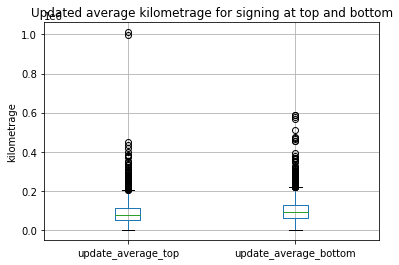

In [14]:
df_update_average_top = df_remove_outlier[df_remove_outlier['condition']=='Sign Top'].loc[:,'update_average'].reset_index(drop=True)
df_update_average_bottom = df_remove_outlier[df_remove_outlier['condition']=='Sign Bottom'].loc[:,'update_average'].reset_index(drop=True)
df_update_average_all = pd.DataFrame()
df_update_average_all['update_average_top'] = df_update_average_top
df_update_average_all['update_average_bottom'] = df_update_average_bottom
boxplt = df_update_average_all.boxplot()
boxplt.set_ylabel('kilometrage')
boxplt.set_title('Updated average kilometrage for signing at top and bottom')

We summarize the results here. mean1/2, std1/2, nobs1/2 denote the mean, std and number of top/bottom-signed policy.

In [15]:
print(f'mean1={df_update_average_top.mean()}, std1={df_update_average_top.std()}, nobs1={len(df_update_average_top.index)}, mean2={df_update_average_bottom.mean()}, std2={df_update_average_bottom.std()}, nobs2={len(df_update_average_bottom.index)}')

mean1=85831.56234664585, std1=52463.50273346047, nobs1=6385, mean2=98755.65578543447, std2=52780.440513860514, nobs2=6211


#### Task 4.2
We need to perform the t-test when the sample size is unequal between two groups. We use stats.ttest_ind_from_stats to achieve such goal. Specifically, we do not assume equal population variance and adopt the Welch’s t-test.

In [16]:
stats.ttest_ind_from_stats(mean1=df_update_average_top.mean(), std1=df_update_average_top.std(), nobs1=len(df_update_average_top.index), mean2=df_update_average_bottom.mean(), std2=df_update_average_bottom.std(), nobs2=len(df_update_average_bottom.index), equal_var=False)

Ttest_indResult(statistic=-13.780273195163407, pvalue=6.861625868186757e-43)

Using significance level $\alpha$ = 0.05 for statistical testing, the pvalue tells us that the difference between two scenarios is statistically significant.

#### Task 4.3
No, no evidence supports that signing at the top does decrease dishonesty. The average updated kilometrage is statistically significantly lower when people sign at top. Since the economic incentive would encourage people to report less kilometrage when lying, people should report higher kilometrage if signing at the top decreases disnoesty. A lower average kilometrage cannot show a decrease in dishonesty.

#### Task 4.4
Under the same condition (both groups sign at the bottom), we would not expect any differences between the average values between sign at the top vs. sign at the bottom conditions for the baseline contract.

#### Task 4.5
We calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom) and plot the two kilometrage distributions.

Text(0, 0.5, 'kilometrage')

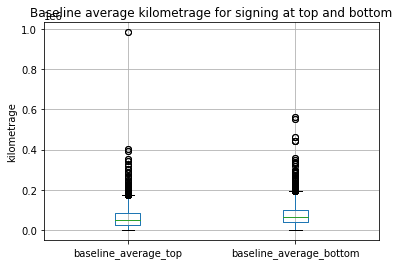

In [17]:
df_baseline_average_top = df_remove_outlier[df_remove_outlier['condition']=='Sign Top'].loc[:,'baseline_average'].reset_index(drop=True)
df_baseline_average_bottom = df_remove_outlier[df_remove_outlier['condition']=='Sign Bottom'].loc[:,'baseline_average'].reset_index(drop=True)
df_baseline_average_all = pd.DataFrame()
df_baseline_average_all['baseline_average_top'] = df_baseline_average_top
df_baseline_average_all['baseline_average_bottom'] = df_baseline_average_bottom
boxplt = df_baseline_average_all.boxplot()
boxplt.set_title('Baseline average kilometrage for signing at top and bottom')
boxplt.set_ylabel('kilometrage')

#### Task 4.6
We also perfom the Welch’s t-test here.

In [18]:
stats.ttest_ind_from_stats(mean1=df_baseline_average_top.mean(), std1=df_baseline_average_top.std(), nobs1=len(df_baseline_average_top.index), mean2=df_baseline_average_bottom.mean(), std2=df_baseline_average_bottom.std(), nobs2=len(df_baseline_average_bottom.index),equal_var=False)

Ttest_indResult(statistic=-16.995175072371335, pvalue=4.6173357509062324e-64)

Using significance level $\alpha$ = 0.05 for statistical testing, the pvalue tells us that the difference between two scenarios is statistically significant. The result is contrary to our initial conjecture. We guess there might be something wrong about the data.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the baselined contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

#### Task 5.1
For the baseline contract and for the baselined contract, we plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 

Text(0.5, 1.0, 'Baseline motorcycle 1 odemeter')

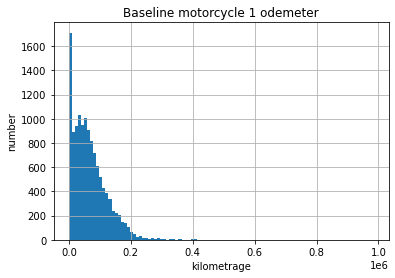

In [19]:
df_remove_outlier.hist(column=['baseline_motorcycle1'], bins=100)
plt.xlabel('kilometrage')
plt.ylabel('number')
plt.title('Baseline motorcycle 1 odemeter')

Text(0.5, 1.0, 'Update motorcycle 1 odemeter')

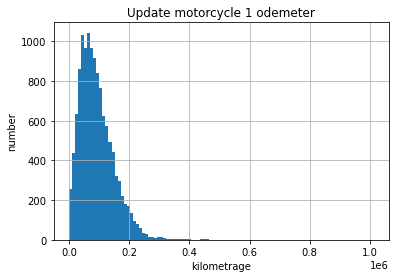

In [20]:
df_remove_outlier.hist(column=['update_motorcycle1'],bins=100)
plt.xlabel('kilometrage')
plt.ylabel('number')
plt.title('Update motorcycle 1 odemeter')

#### Task 5.2
For the first motorcycle insured by the company in each policy, we plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.

Text(0.5, 1.0, 'Difference between baseline and updated motorcycle 1 odemeter')

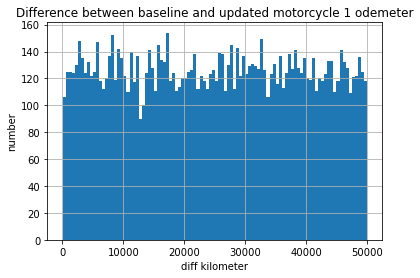

In [21]:
(df_remove_outlier['update_motorcycle1']-df_remove_outlier['baseline_motorcycle1']).hist(bins=100)
plt.xlabel('diff kilometer')
plt.ylabel('number')
plt.title('Difference between baseline and updated motorcycle 1 odemeter')

#### Task 5.3

For the baseline odometer data, there are abnormally large amount of data lied near zero, while for the updated odometer data there are no such phenomena. Meanwhile, the difference between two contract applied a nearly uniform distribution between 0 to 50000 kilometer, but the number suddenly drops to zero after 50000, which is impossible for real data.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

#### Task6.1
Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), we plot the 
distribution of occurrences of the last three digits and repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

Text(0.5, 1.0, 'Baseline motorcycle 1 odometer')

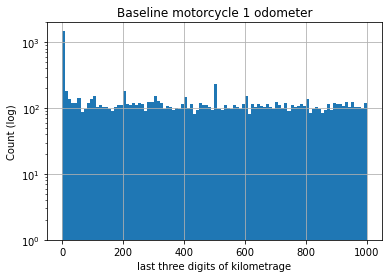

In [22]:
hist = (df_remove_outlier['baseline_motorcycle1']%1000).hist(log=True, bins=100)
hist.set_xlabel('last three digits of kilometrage')
hist.set_ylabel('Count (log)')
hist.set_ylim(1, 2000)
hist.set_title('Baseline motorcycle 1 odometer')

Text(0.5, 1.0, 'Updated motorcycle 1 odometer')

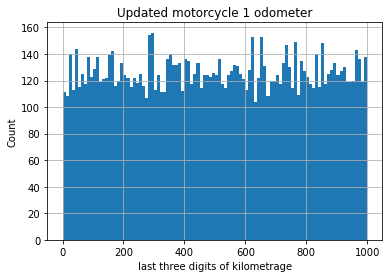

In [23]:
hist = (df_remove_outlier['update_motorcycle1']%1000).hist(bins=100)
hist.set_xlabel('last three digits of kilometrage')
hist.set_ylabel('Count')
hist.set_title('Updated motorcycle 1 odometer')

#### Task 6.2

For the base line data, there are large number of data with '000' or '500' as the last three digits. While for the updated data, the last three digits are uniformly distributed.

#### Task 6.3

The large number of data ends with '000' or '500' may be caused by rounding. When asked to give their odometer, people may not give the precise number, but tend to round the number, so if the original data is 1005, then they will just fill 1000 into the form. Thus we find that there are more data ends with '000' or '500 in the baseline data. As for the updated data, the uniform distribution is suspicious, and it implies that the data could be fraud.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

#### Task7.1

Some id exists in the font file but not in the dataframe of the contracts. Here, we use merge as an inner join operation to find the ids exist in both datasets. 

In [24]:
fontsdata = filefolder + "fonts.csv"
fonts = pd.read_csv(fontsdata)
fonts_df = df_remove_outlier.merge(fonts, on="id")
fonts_df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,Sign Bottom,13483,32050,33346,NaN,NaN,NaN,NaN,NaN,NaN,1,32050.0,33346.0,1296.0,Helvetica
12592,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2,31680.5,54183.5,22503.0,Arial
12593,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2,60190.0,86243.0,26053.0,Helvetica
12594,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1,29884.0,35459.0,5575.0,Helvetica


#### Task7.2

In [25]:
fonts_df['font'].value_counts()

Arial        6299
Helvetica    6297
Name: font, dtype: int64

There are 6299 rows with the Arial font and  6297 rows with the Helvetica font.

Text(0.5, 0, 'kilometrage')

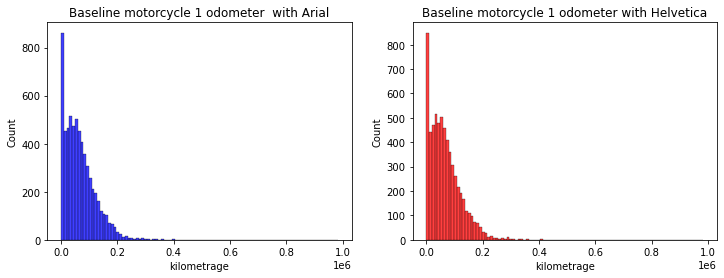

In [26]:
arial = fonts_df[fonts_df['font'] == 'Arial']
helvetica = fonts_df[fonts_df['font'] == 'Helvetica']

fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(arial['baseline_motorcycle1'], bins = 100, color = 'blue' , ax=ax[0])
ax[0].set_title('Baseline motorcycle 1 odometer  with Arial')
ax[0].set_xlabel('kilometrage')
sns.histplot(helvetica['baseline_motorcycle1'], bins = 100, color = 'red', ax=ax[1])
ax[1].set_title('Baseline motorcycle 1 odometer with Helvetica')
ax[1].set_xlabel('kilometrage')

#### Task7.3

In [27]:
c = 0
s = arial['baseline_motorcycle1']
for i in range(len(s)):
    j = s.iloc(0)[i]
    if j %1000 == 0:
        c = c+1
print("Among " + str(len(s)) + " baseline motocycle 1 odometer readings with Arial, there are " + str(c) + " readings that the last three digits are 0 ")

Among 6299 baseline motocycle 1 odometer readings with Arial, there are 1318 readings that the last three digits are 0 


Because most of the last three digits of the baseline odometer reading of motorcycle 1 fall into 0, we take logscale to the y axis that stands for the count to plot the distribution in a better display.

(1, 2000)

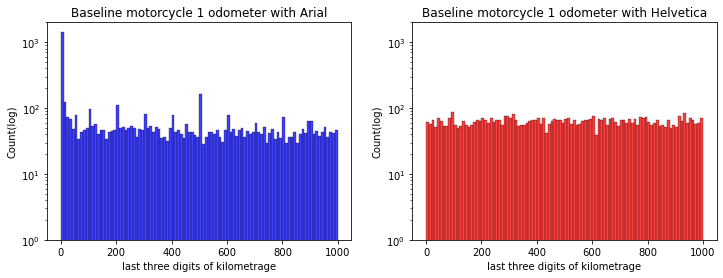

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(arial['baseline_motorcycle1']%1000, bins = 100, color = 'blue' , ax=ax[0])
ax[0].set_title('Baseline motorcycle 1 odometer with Arial')
ax[0].set_xlabel('last three digits of kilometrage')
ax[0].set_ylabel('Count(log)')
ax[0].set_yscale('log')
ax[0].set_ylim(1, 2000)
sns.histplot(helvetica['baseline_motorcycle1']%1000, bins = 100, color = 'red', ax=ax[1])
ax[1].set_title('Baseline motorcycle 1 odometer with Helvetica')
ax[1].set_xlabel('last three digits of kilometrage')
ax[1].set_ylabel('Count(log)')
ax[1].set_yscale('log')
ax[1].set_ylim(1, 2000)

(1, 2000)

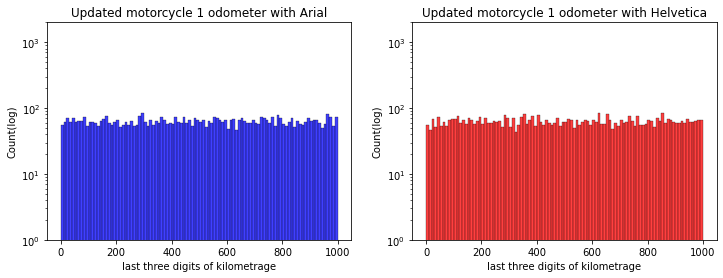

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(arial['update_motorcycle1']%1000, bins = 100, color = 'blue' , ax=ax[0])
ax[0].set_title('Updated motorcycle 1 odometer with Arial')
ax[0].set_xlabel('last three digits of kilometrage')
ax[0].set_ylabel('Count(log)')
ax[0].set_yscale('log')
ax[0].set_ylim(1, 2000)
sns.histplot(helvetica['update_motorcycle1']%1000, bins = 100, color = 'red', ax=ax[1])
ax[1].set_title('Updated motorcycle 1 odometer with Helvetica')
ax[1].set_xlabel('last three digits of kilometrage')
ax[1].set_ylabel('Count(log)')
ax[1].set_yscale('log')
ax[1].set_ylim(1, 2000)

#### Task7.4

In 7.2, the distributions of the first motorcycle's baseline kilometres with the Arial font and the Helvetica font look almost the same. In 7.3, the two distributions of the last three digits with different fonts have obvious differences. Similarly to the distribution of baseline kilometrage in task 6.1, the last three digits of kilometrage with the Arial font has a lot of data that falls into 0. From 6.1 we know that people are likely to underreport their actual reading to a smaller rounded value. However, the other one with the Helvetica font is uniformly distributed between 0 to 1000. It is contradictory to the previous insight of the dataset. The three digits between 0 to 1000 can be generated randomly by a computer program. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

* The difference of updated and baseline kilometrage follows a uniform distribution over 0 to 50,000 kilometres(task 5.2). This is almost impossible in real life, that the number of motorcycles running very large/small kilometres is the same as those running average kilometres. The shape should be a bell curve in most real-life situations. Moreover, the last three digits for data with Helvetica font are uniformly distributed. It contradicts the distributions of baseline data with Arial font (task 7.3) and the overall baseline data for motorcycle 1(task 6.1) that have more value on 000 and 500. 
* In addition to customers rounding baseline kilometrage that makes it end with 000 and 500, someone probably modified the updated kilometrage by adding a uniformly sampled value to the baseline kilometrage. This could explain the uniform distribution of both the difference between baseline and updated data and the last three digits of updated data. Also, the experiment with signing on top or bottom may not be conducted in a correct way. As shown in task 4.6, people signing at the top also have lower baseline kilometrage, but there was no intervention for baseline kilometrage (task 4.4). This indicates a biased sampling. It’s possible that people with low kilometrage were assigned the ‘Sign Top’ forms.
* The data cannot lead to the conclusion since the data itself has been tampered with. Even if the data is reliable, task 4.2 shows that the average updated kilometrage is lower when people sign on the top, making insurance with a lower premium. This contradicts the hypothesis that signing on the top decreases dishonesty. 
